# Homework 3 - CSCI 7000
## Behzod Mirpochoev

### Problem 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from palettable.cartocolors.sequential import Peach_4, Teal_4
from scipy.stats import nbinom

In [2]:
gamma = 3
duration = 3
dt = 0.001
time = np.arange(0, duration + dt, dt)

s = [np.array([0.999] * 4).reshape(4,1)] + [np.array([0] * 4).reshape(4,1)] * (len(time)-1)
i = [np.array([0.001] * 4).reshape(4,1)] + [np.array([0] * 4).reshape(4,1)] * (len(time)-1)
Dp = np.diag([1,2,3,4])
Dw_inv = inv(np.diag([0.25] * 4))
C = np.ones((4, 4)) * 0.45

for t in range(1, len(time)):
    Ds = np.diag(np.squeeze(s[t-1]))
    s[t] = s[t-1] + dt * (-Ds @ Dp @ C @ Dw_inv @ i[t-1])
    i[t] = i[t-1] + dt * ((Ds @ Dp @ C @ Dw_inv @ i[t-1]) - (gamma * i[t-1]))

avg_rel_sus = [np.sum(Dp @ s[t]) / np.sum(s[t]) for t in range(len(time))]

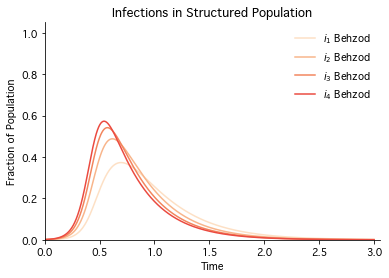

In [3]:
colors = Peach_4.mpl_colors

for m in range(4):
    i_m = [group[m] for group in i]
    plt.plot(time, i_m, color = colors[m], label = r'$i_{{{}}}$ Behzod'.format(m+1))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Geneva'
plt.legend(frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0,1.05)
plt.xlim(0,duration+0.05)
plt.ylabel('Fraction of Population')
plt.xlabel('Time')
plt.title('Infections in Structured Population')
plt.savefig('2c.jpg', dpi = 300)

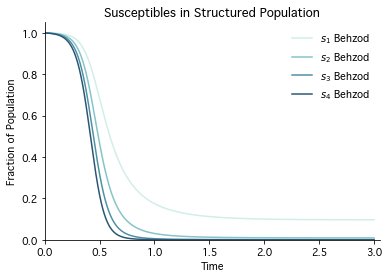

In [4]:
colors = Teal_4.mpl_colors

for m in range(4):
    s_m = [group[m] for group in s]
    plt.plot(time, s_m, color = colors[m], label = r'$s_{{{}}}$ Behzod'.format(m+1))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Geneva'
plt.legend(frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0,1.05)
plt.xlim(0,duration+0.05)
plt.ylabel('Fraction of Population')
plt.xlabel('Time')
plt.title('Susceptibles in Structured Population')
plt.savefig('2d_sus.jpg', dpi = 300)

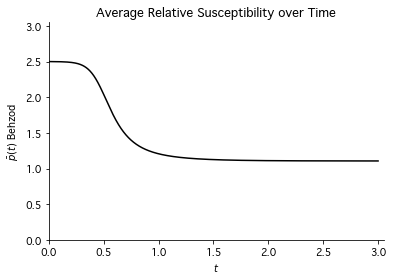

In [5]:
plt.plot(time, avg_rel_sus, color = 'black')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Geneva'
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0,3.05)
plt.xlim(0,duration+0.05)
plt.ylabel(r'$\bar{p}(t)$ Behzod')
plt.xlabel(r'$t$')
plt.title('Average Relative Susceptibility over Time')
plt.savefig('2d_ars.jpg', dpi = 300)

### Problem 3

In [6]:
def n_children_nbinom(n,p,n_draws):
    draws = nbinom.rvs(n,p,size=n_draws)
    total_children = np.sum(draws)
    return total_children

In [7]:
def single_branching_process(children_function,R0,k,n_generations):
    mean = R0
    variance = mean + (mean**2)/k
    p = mean/variance
    n = mean**2 / (variance - mean)
    z = np.zeros(n_generations,dtype=int)
    z[0] = 1

    for generation in np.arange(1,n_generations):
        z[generation] = children_function(n,p,z[generation-1])
        if z[generation] == 0:
            return z, True
    return z, False

In [8]:
R0 = 3
k = 0.1
trajectory = single_branching_process(n_children_nbinom,R0,k,10)
trajectory[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'branching process size')

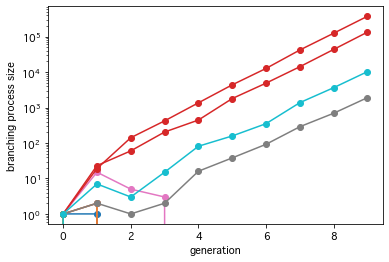

In [9]:
simulations = 30

fig,ax = plt.subplots()
for _ in range(int(simulations)):
    trajectory = single_branching_process(n_children_nbinom,3,0.1,10)
    ax.semilogy(trajectory[0],'-o')
ax.set_xlabel('generation')
ax.set_ylabel('branching process size')

In [10]:
simulations = 1e3
R0 = 3
ks = [0.1, 0.5, 1, 5, 10]
qs = []

for k in ks:
    finite_outbreaks = 0
    for run in range(int(simulations)):
        trajectory = single_branching_process(n_children_nbinom,R0,k,10)
        finite_outbreaks += 1 if trajectory[1] == True else 0
    qs.append(finite_outbreaks / simulations)

for i, q in enumerate(qs):
    print(ks[i], qs[i])

0.1 0.842
0.5 0.529
1 0.31
5 0.104
10 0.094


In [11]:
# takes ~20 mins to run

# R0 = 3
# qs = []
# ks = [0.1, 0.5, 1, 5, 10]
# outbreak_sizes = []
# finite_limit = 1e5

# for k in ks:
#     finite_outbreaks = 0
#     outbreak_size = []
#     simulations = 0
#     while finite_outbreaks < 1e5:
#         simulations += 1
#         trajectory = single_branching_process(n_children_nbinom,R0,k,6)
#         if trajectory[1] == True:
#             finite_outbreaks += 1 
#             outbreak_size.append(np.sum(trajectory[0]))
#         print(k, finite_outbreaks)
#     outbreak_sizes.append(outbreak_size)
#     qs.append(finite_outbreaks / simulations)

In [12]:
# saving outbreaks

# np.savetxt('outbreak_sizes.txt', outbreak_sizes)
outbreak_sizes = np.loadtxt('outbreak_sizes.txt')

In [13]:
# more accurate q estimation

# for i, q in enumerate(qs):
#     print(ks[i], qs[i])

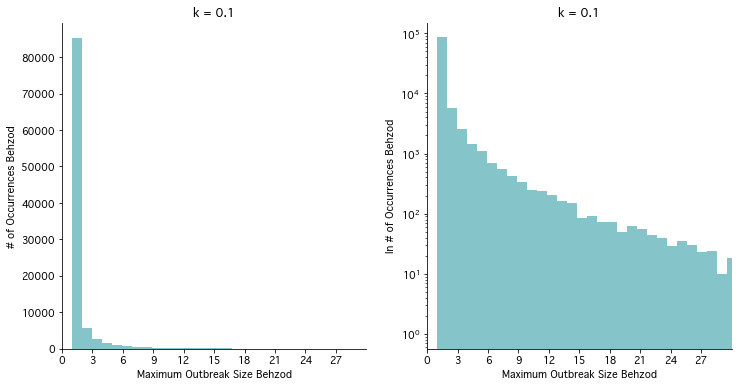

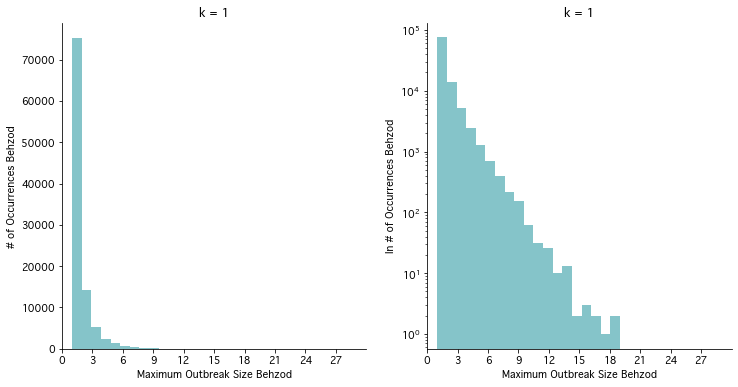

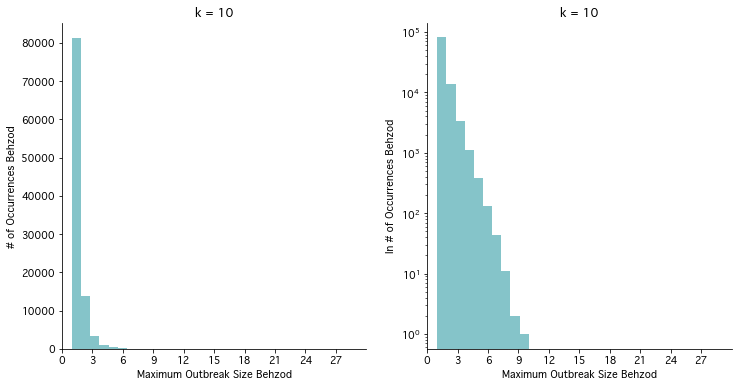

In [14]:
for index_k in [0, 2, 4]: 
    bins = int(max(outbreak_sizes[index_k]))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    axes[0].hist(outbreak_sizes[index_k], color=colors[1], bins=bins)
    axes[0].set_title('k = {}'.format(ks[index_k]))
    axes[0].set_xlabel('Maximum Outbreak Size Behzod')
    axes[0].set_ylabel('# of Occurrences Behzod')
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)
    axes[0].set_xlim(0, 30)
    axes[0].set_xticks(np.arange(0, 30, 3))

    axes[1].hist(outbreak_sizes[index_k], color=colors[1], bins=bins)
    axes[1].set_title('k = {}'.format(ks[index_k]))
    axes[1].set_xlabel('Maximum Outbreak Size Behzod')
    axes[1].set_ylabel('ln # of Occurrences Behzod')
    axes[1].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    axes[1].set_xlim(0, 30)
    axes[1].set_xticks(np.arange(0, 30, 3))
    axes[1].set_yscale('log')

    fig.savefig('3_extra_{}.jpg'.format(index_k+1), dpi=300, bbox_inches='tight')

plt.show()